<a href="https://colab.research.google.com/github/javers12/AdvLinearAlgebra/blob/master/Copy_of_Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:
Case 0: A known polynomial function  𝑓(𝑥)=4−3𝑥2+5𝑥6 
Case 1: A known trigonometric function  𝑓(𝑥)=4−2∗𝑐𝑜𝑠(𝑥)+𝑐𝑜𝑠2(𝑥) 
Case 2: A matrix of data  𝑀  (specified below) with unknown source function
Case 3: An interesting case.
Overview for Case 0: Fit for a known polynomial function  𝑓(𝑥)=4−3𝑥2+5𝑥6 

We generate data for the polynomial function
𝑓(𝑥)=4−3𝑥2+5𝑥6 
We know two things: The input (x) and the output (f(x)) for that input. Pretend we know the (x, f(x)) pairs for a lot of different points, say (cough... cough...)  3  of them.
We want to find out what combination of polynomials  1,𝑥,𝑥2,𝑥3,𝑥4,𝑥5,  and  𝑥6  best matches the data. For each input/output pair  (𝑥,𝑓(𝑥)) , we generate one row of data in the system  𝐴𝑐=𝑏 :
[𝑐0∗1+𝑐1∗𝑥+𝑐2∗𝑥2+𝑐3∗𝑥3+...𝑐6𝑥6=𝑓(𝑥)] 
or
[1𝑥𝑥2𝑥3𝑥4𝑥5𝑥6]⎛⎝⎜⎜⎜⎜⎜⎜⎜⎜⎜𝑐0𝑐1𝑐2𝑐3𝑐4𝑐5𝑐6⎞⎠⎟⎟⎟⎟⎟⎟⎟⎟⎟=[𝑓(𝑥)] 
Be careful -- the unknowns are the coefficients in front - the  𝑐0,𝑐1,𝑐2,...,𝑐6  values. Since we know  𝑥 , then we know  𝑥,𝑥2,𝑥3,𝑥4,...𝑥6 . And we know the output  𝑓(𝑥)  for that row.
So, if we know  𝑥=2  and  𝑓(2)=312 , then we populate the row as:
[𝑐0∗1+𝑐1∗2+𝑐2∗4+𝑐3∗8+...+𝑐6∗64=312] 
or
[124816𝑥3264]⎛⎝⎜⎜⎜⎜⎜⎜⎜⎜⎜𝑐0𝑐1𝑐2𝑐3𝑐4𝑐5𝑐6⎞⎠⎟⎟⎟⎟⎟⎟⎟⎟⎟=[312] 
where the vector  𝑐⃗  contains the unknowns  𝑐0,𝑐1,𝑐2,…𝑐6 
So... let's generate the matrix:
0.1 Setting up the system:

We'll generate some data points for our system using the function
𝑓(𝑥)=4−3𝑥2+5𝑥6 
We'll store the input data in actual_data_x and the output in actual_data_y.
We'll also use the data to set up a system
𝑀𝑥⃗=𝑏⃗ 
where actual_data_x is used to populate matrix  𝑀  and actual_data_y is used to populate  𝑏⃗ .

In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(3):
    # pick a random number between -1 and 1
    # pick a random number between -5 and 5
    # pick a random number between -30 and 30
    x = 2*random.random() - 5
    f = 4 - 3*x**2 + 5*x**6
    actual_data_x.append(x)
    actual_data_y.append(f)

In [0]:
# uncomment code below  to look at the data in actual_data_x or in actual_data_y

#actual_data_x
#actual_data_y

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

In [0]:
# Uncomment either line below to show the matrix M
# or the first five entries of b

M
b[:5]

matrix([[70196.56094749],
        [ 6681.92927691],
        [29527.22601577]])

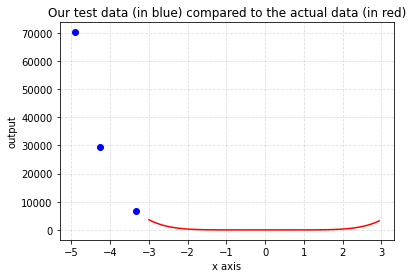

In [0]:
# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[-8.61687372e+04],
        [-1.56195560e+04],
        [-6.12510662e+02],
        [ 4.62072840e+02],
        [-5.71486997e+02],
        [ 5.12631500e+01],
        [ 9.76806012e+00]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

591076.0276150837

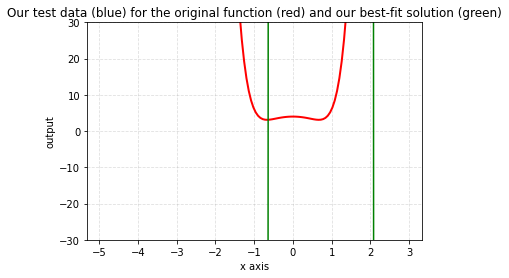

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,30)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

In [0]:
#  Uncomment the lines below to show the matrix U, S, and Vh:
#  Notice that in S only the singular values are stored, not the entire matrix.
#U
#S
#Vh

In [0]:
#  The 2nd singular value is:
S[1]

226.6155042018343

In [0]:
# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 3

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [0]:
#  We should be able to figure out the size of U and Vh that we'll use:
#
#  U S Vh  =   [         .     ] [             .         ]  [            .      ]
#              [ U_use   .     ] [  sigma_use  .         ]  [   Vh_use   .      ]
#              [         . U_d ] [.......................]  [            . Vh_d ]
#              [         .     ] [             . sigma_d ]  [            .      ]
#
#
#  Uncomment these lines (one at a time) to check that U_use, sigma_use, and Vh_use are the right sizes, as well as U_d, sigma_d, and Vh_d
U_use.shape
#sigma_use.shape
#Vh_use.shape
#U_d.shape
#sigma_d.shape
#Vh_d.shape

(3, 3)

In [0]:
#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[-3.26050440e-07],
        [ 6.56875795e-06],
        [-1.20360251e-04],
        [ 1.87420339e-03],
        [-2.03397693e-02],
        [-9.18940699e-04],
        [ 4.99998834e+00]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

0.010277605922997177

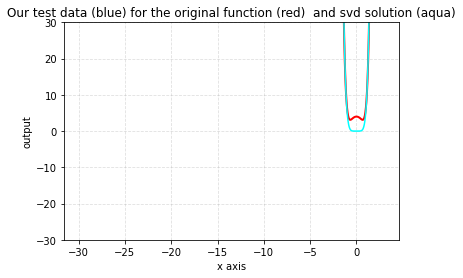

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

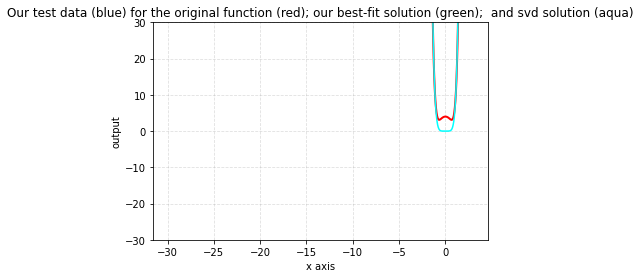

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from bestfit:
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)

# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata, svd_fit, 'aqua')


#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red); our best-fit solution (green);  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

My approach to this was basically looking at case 0. I used most of the code just modifying the beginning part to see how big the range of error was. The best fit line accomadated a larger range of error. The exact amount was 219121203116.79865 but this was for -30 and 30. For -1 and 1 we got 19.423628855744415. For -5 and 5 we got 591076.0276150837. The biggest range error was obviosly the higher number so the higher the number the bigger the error range will be for the best fit line. Note the test data in the graphs get smaller as the numbers get higher (-1 and 1, -5 and 5, -30 and 30).   